# Climate Coding Challenge

Climate change is impacting the way people live around the world!

# Part 1: Overview

Higher highs, lower lows, storms, and smoke – we’re all feeling the effects of climate change. 
In this workflow, I am looking at climate change impacts in Saint Louis, Missouri. 
This is where I spent my childhood. I don't think I noticed any impacts of climate change growing up, so I'm excited to see what we find.


In [35]:
# Import libraries
import earthpy # Manage local data
import pandas as pd

# Part 2: Data Wrangling

In this section, I downloaded temperature data from a weather station in Saint Louis, Missouri and saved the data frame.

In [36]:
# Retrieve stored variables.
%store -r stl_climate_df

# set parameter
project_name = 'Saint Louis Climate'

# Set up project folders
project = earthpy.Project(
   'Saint Louis Climate',
    dirname = '/workspaces/02-climate-algrego')

# Check where the data ended up
project.project_dir

PosixPath('/workspaces/02-climate-algrego')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13983 entries, 1970-01-01 to 2012-05-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  13983 non-null  object 
 1   TOBS     13852 non-null  float64
dtypes: float64(1), object(1)
memory usage: 327.7+ KB


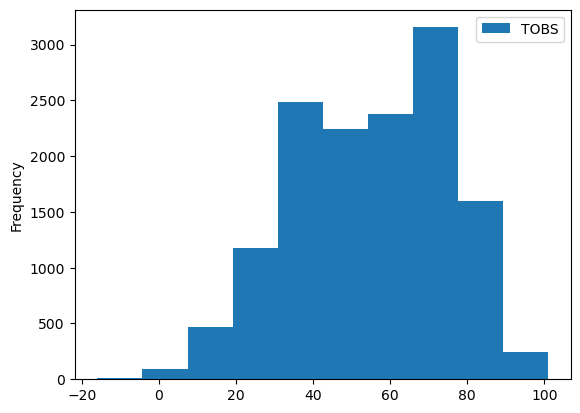

In [37]:
# Load climate data from NCEI
stl_climate_df = pd.read_csv(
    project.project_dir / 'Saint Louis Climate', 
    index_col = 'DATE', parse_dates=True, na_values=['NaN']
)

# Output data to see column data
stl_climate_df

#Output to see histogram plot results
stl_climate_df.plot.hist()

# Output data to see info
stl_climate_df.info()

In [38]:
# View project directory
!ls {project.project_dir}

 00-climate-start.ipynb        climate-portfolio.html
 01-climate-overview.ipynb     climate-portfolio.ipynb
 02-climate-wrangle.ipynb      ncei-climate-boulder.csv
 03-climate-units.ipynb        python-calculator.ipynb
 04-climate-plot.ipynb	       README.md
 05-climate-summary.ipynb     'Saint Louis Climate'
 climate-download-data.ipynb   stl-climate-data.csv


In [39]:
# Check that data was imported into a pandas DataFrame
type(stl_climate_df)

pandas.core.frame.DataFrame

In [40]:
# Reduce to single temperature column
stl_climate_df = stl_climate_df[["TOBS"]] 

# Part 3: Temperature Units

In this section we are changing the temperature units for the data to Temperature in F and adding Temperature in C as well.

In [41]:
# Change column name of temperature data
stl_climate_df_units = stl_climate_df.rename(columns={
    'TOBS': 'Temp_F',
})

stl_climate_df_units

%store stl_climate_df project

Stored 'stl_climate_df' (DataFrame)
Stored 'project' (Project)


In [42]:
# Add column in data frame for Temperature in Celcius
stl_climate_df_units['Temp_C'] = ( (stl_climate_df_units['Temp_F']-32) * (5/9))

# Display Changes
stl_climate_df_units

,Temp_F,Temp_C
DATE,,
1970-01-01,23.0,-5.000000
1970-01-02,26.0,-3.333333
1970-01-03,16.0,-8.888889
1970-01-04,20.0,-6.666667
1970-01-05,34.0,1.111111
...,...,...
2012-05-27,76.0,24.444444
2012-05-28,78.0,25.555556
2012-05-29,71.0,21.666667


In [43]:
#Store variables
%store stl_climate_df_units

Stored 'stl_climate_df_units' (DataFrame)


# Part 4: Plotting the Results
In this section I plot the results of the temperature data. For this specific weather station, the data only went from 1970 to 2012, which affects the results that we see. 

In [44]:
# Import packages needed for plotting
import matplotlib.pyplot as plt
plt.close("all")

import hvplot.pandas
import pandas as pd
import holoviews as hv
hv.extension("bokeh")
import pathlib

<Axes: xlabel='DATE'>

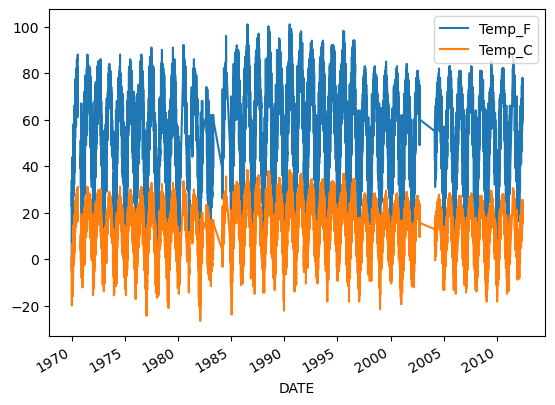

In [45]:
#Plot of initial results
stl_climate_df_units.plot()

<Axes: title={'center': 'Saint Louis Climate Data'}, xlabel='Year', ylabel='Temperature (°F)'>

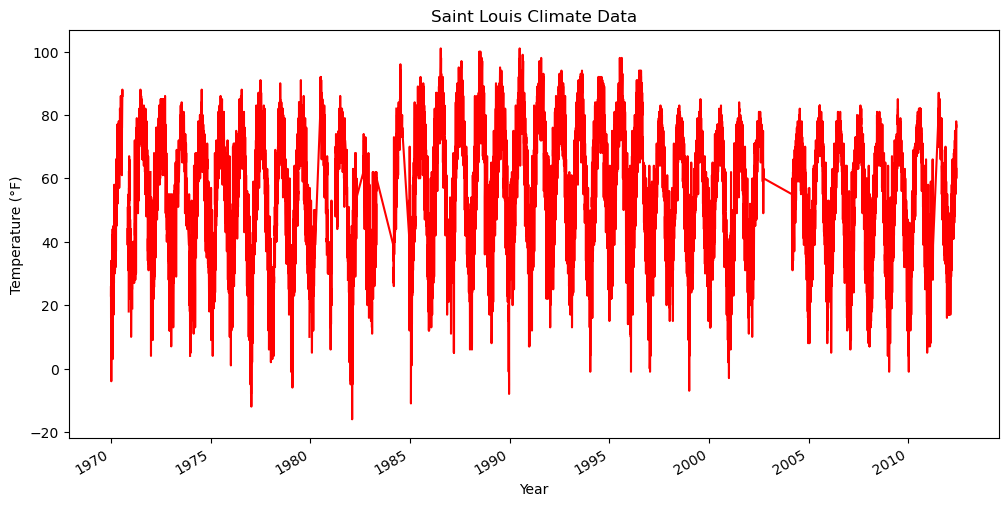

In [46]:
# Plot the data using .plot (standard)
stl_climate_df_units.plot(
    y='Temp_F' ,
    title='Saint Louis Climate Data',
    xlabel='Year',
    ylabel='Temperature (\u00b0F)',
    color='red',
    legend=False, # Remove legend 
    figsize=(12,6)
)    

In [47]:
# Resample data to only include annual means of temperature data
stl_ann_climate_df = (
    stl_climate_df_units
    .resample('YS')
    .mean()
)
stl_ann_climate_df

# Check that data frame is <class 'pandas.core.frame.DataFrame'>
print(type(stl_climate_df))  

stl_ann_climate_df = stl_ann_climate_df.reset_index()



<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'Saint Louis Climate Data'}, xlabel='Year', ylabel='Temperature (°F)'>

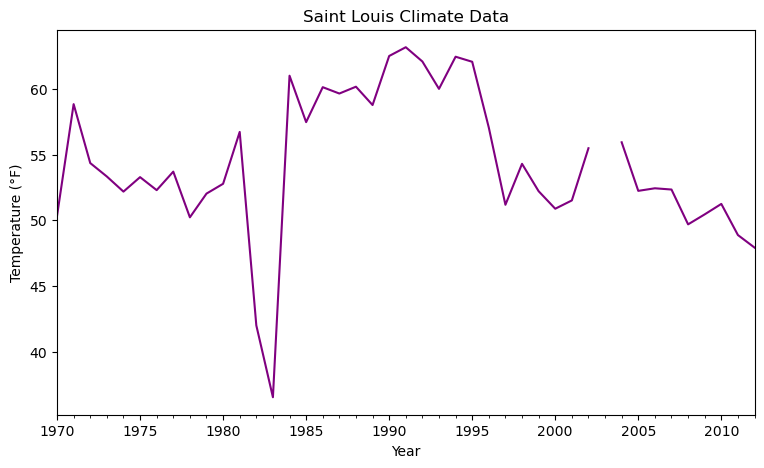

In [48]:
# Plot the annual data
stl_ann_climate_df.plot(
    x='DATE',
    y='Temp_F' ,
    title='Saint Louis Climate Data',
    xlabel='Year',
    ylabel='Temperature (\u00b0F)',
    legend=False, # Remove legend 
    color='purple',
    figsize=(9,5),
)


In [49]:
import hvplot.pandas

# Plot the annual data interactively
stl_ann_climate_plot = stl_ann_climate_df.hvplot(
    x='DATE',
    y='Temp_F' ,
    title='Saint Louis Climate Data',
    xlabel='Year',
    ylabel='Temperature (\u00b0F)',
    legend=False, # Remove legend 
    color='purple'
    
)

stl_ann_climate_plot

:Curve   [DATE]   (Temp_F)

Interesting things to notice in this plot:
- There is a significant drop in temperature around 1983. 
- There is a gap in data from 2002 to 2004.  
- Temperature in general do not seem to be showing a signifcant trend upward or downard.

In [50]:
%store stl_ann_climate_plot stl_ann_climate_df 

Stored 'stl_ann_climate_plot' (Curve)
Stored 'stl_ann_climate_df' (DataFrame)


Part 5: Climate Summary

In [51]:
# Load variables from previous notebooks
%store -r stl_ann_climate_df stl_ann_climate_plot stl_climate_df stl_climate_df_units

In [52]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [53]:
# Fit an OLS Linear Regression to the data
from sklearn.linear_model import LinearRegression
import numpy as np

# Reset index and extract year
stl_ann_climate_df = stl_ann_climate_df.reset_index(drop=True)
stl_ann_climate_df['Year'] = stl_ann_climate_df['DATE'].dt.year

#Drop Missing Values
stl_ann_climate_df = stl_ann_climate_df.dropna(subset=['DATE', 'Temp_F'])

# Reshape 'Year' column to be a 2D array for scikit-learn
X = stl_ann_climate_df['Year'].values.reshape(-1,1)
y = stl_ann_climate_df['Temp_F'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.03609464391292252
Intercept: 126.19617480277927


The slope is slightly negative for this data at -0.03, which does not convey a signifcant trend.

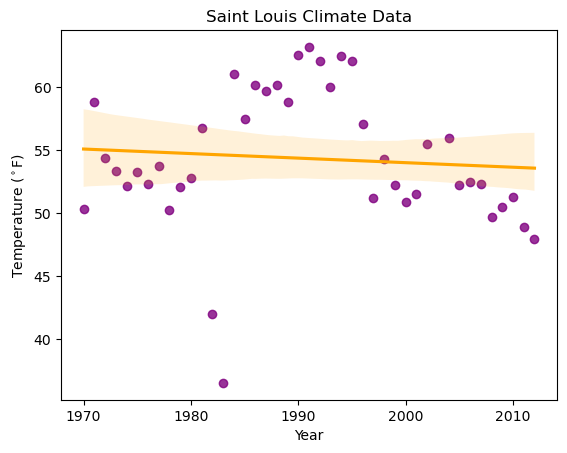

In [54]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    
  x = stl_ann_climate_df['Year'],
  y = stl_ann_climate_df['Temp_F'],

  # Change color of data points
  scatter_kws={"color": "purple"}, line_kws={"color": "orange"}

)


# Set plot labels
ax.set(
    title='Saint Louis Climate Data',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'  
)

# Display the plot without extra text
plt.show()

# Conclusion

In this workflow I have collected temperature data from a weather station in Saint Louis, Missouri and plotted the results with differing visuals. We can see that this station does not have many data points and does not span a long time window, so we are unable to draw many conclusions about the data. In the final plot, we see a slight linear decrease in temperature from 1970 to 2010. It would be interesting to see other weather stations in this area if they have longer temperature trend data. 